<a href="https://colab.research.google.com/github/ank090/sentiment_analysis/blob/main/Sentiment_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud, STOPWORDS

importing dataset

In [ ]:
dataset=pd.read_csv('tweets.csv',encoding='ISO-8859-1')
#texts=dataset.iloc[:,2]

Creating word frequency

In [ ]:
def word_freq(text):
  list_of_words=[]
  for text in text.split():
   list_of_words.extend(text)
  freq=pd.Series(list_of_words).value_counts()
  #print(freq[:20])
  return freq
#word_freq(dataset.text.str)

creating word cloud

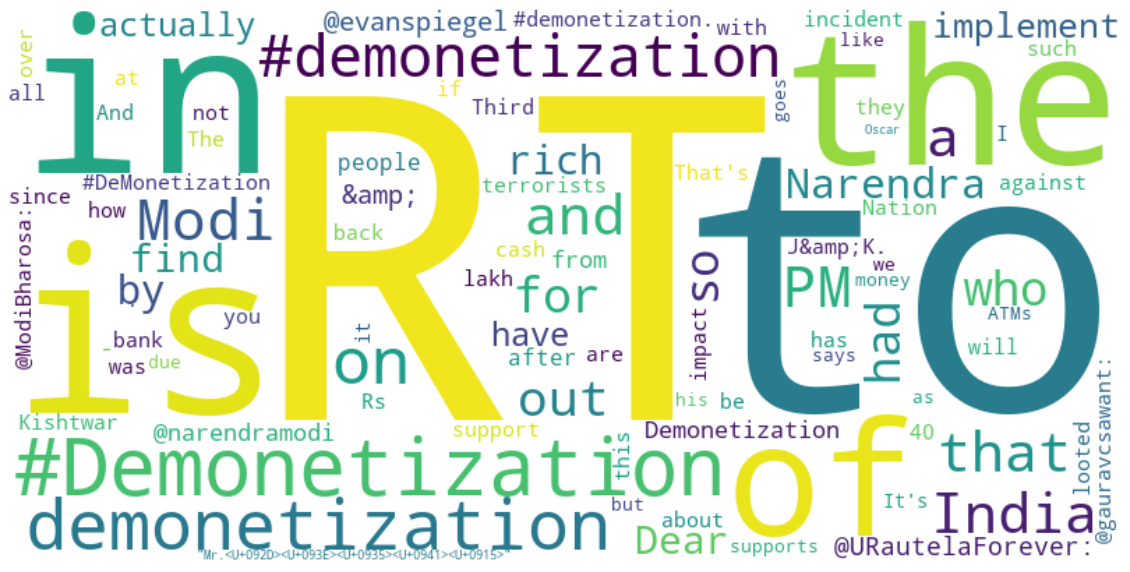

In [ ]:
import matplotlib.pyplot as plt
def word_cloud(words):
  wc=WordCloud(width=800,height=400,max_words=200,background_color='white').generate_from_frequencies(words)
  plt.figure(figsize=(20, 12))
  plt.imshow(wc,interpolation='bilinear')
  plt.axis('off')
  plt.show()
word_cloud(word_freq(dataset.text.str))

stop words

In [ ]:
STOPWORDS.update({'to','the','is','in','https','//t','amp','s','j','t','y','c','>','ed>','bd>','b','o','yo','co/'})

cleaning text

demonetization    14515
modi               3093
india              3021
pm                 2764
narendra           1566
rich               1509
find               1422
dear               1411
implement          1400
act                1396
evanspiegel        1389
ally               1376
ra                 1283
telaforever        1273
e                  1227
people             1216
narendramodi       1204
ppo                1179
bank               1046
p                  1034
q                  1001
will                969
d                   910
ch                  908
rs                  879
m                   845
f                   821
d>                  817
abo                 800
cash                717
sho                 714
h                   708
impact              703
lakh                694
%                   666
terrorists          659
st                  648
re                  644
pa                  636
ga                  618
nation              594
g               

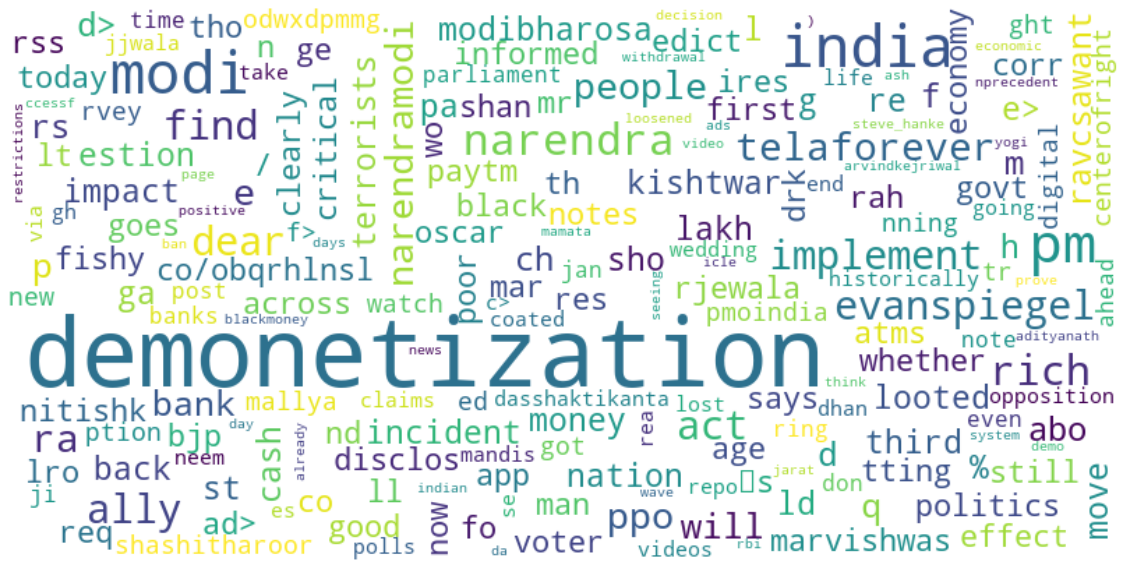

In [ ]:
def clean(text):
  text=text.lower()
  text=re.sub(r'rt' , " " , text)
  text=re.sub(r'[?.\'#!@&:",;-]',' ',text)
  text=re.sub(r'&amp',"&",text)
  text=re.sub(r'[<u+\d{3}.<u+\d{3}.<u+\d{3}.<u+\d{3}.<u+\d{3}]'," ",text)
  #<u+092d><u+093e><u+0935><u+0941><u+0915> 
  return text
tweet=dataset.text.apply(lambda x:clean(x))
freq=word_freq(tweet.str)
freq=freq.drop(labels=STOPWORDS,errors='ignore')
print(freq[:50])
word_cloud(freq)